# Algoritmos Elementales de Grafos

## Funciones básicas para dibujar

In [1]:
# Necesitas instalar graphviz para correr este notebook!

from graphviz import Graph, Digraph
from IPython.display import display

# Usa esta función para dibujar un grafo no dirigido
def plotear_grafica(G, color = {}):
        grafica = Graph(graph_attr = {'size':'4'})
        for vertice in G:
            if not vertice in color or color[vertice] == 'white':
                grafica.node(vertice)
            else:
                if color[vertice] == 'black':
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice], 
                                 fontcolor = 'white')
                else:
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice])
        for n1 in G:
            for n2 in G[n1]:
                if n1 < n2:
                    grafica.edge(n1, n2)
        display(grafica)

# Usa esta para dibujar un grafo dirigido (Árboles para esta tarea)
def plotear_graficad(p):
        grafica = Digraph(graph_attr = {'size':'3'})
        for v1 in p:
            if p[v1] != None:
                for v2 in p[v1]:
                    grafica.edge(v2, v1)
        display(grafica)

## Ejemplo de un grafo

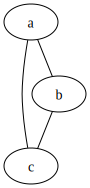

In [2]:
def make_link(G, v1, v2):
    if v1 not in G:
        G[v1] = {}
    (G[v1])[v2] = 1
    if v2 not in G:
        G[v2] = {}
    (G[v2])[v1] = 1
    return G

aristas = [('a', 'b'), ('b', 'c'), ('a', 'c')]

GX = {'c':{}}
for v1, v2 in aristas:
    make_link(GX, v1, v2)

plotear_grafica(GX, {})

## 1.- (5pts) Dibuje el siguiente grafo:

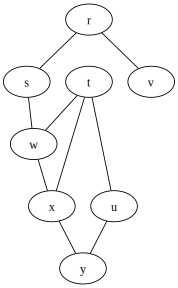

In [3]:
# ESCRIBE TÚ CÓDIGO AQUÍ!
G1 = {'t':{}}

aristas = [('r', 'v'), ('r', 's'), ('s', 'w'), ('t', 'w'), ('x', 'w'), ('t', 'x'), ('t', 'u'), ('x', 'y'), ('u', 'y')]

for v1, v2 in aristas:
    make_link(G1, v1, v2)

#print G1
plotear_grafica(G1, {})

## 2.- (5pts) Implemente DFS: Tú código debe reproducir la salida de la segunda celda.

In [5]:
def DFS(G, vertice, color):
    # Escribe tú código aquí.

    if color[vertice] == 'gray' or color[vertice] == 'black':
      return 0 

    print( 'nodo descubierto: ', vertice)
    color[vertice] = 'gray'
    nodos_visitados = 1

    plotear_grafica(G, color)

    for v in G[vertice]:
      if G[vertice][v] == 1:
        nodos_visitados += DFS(G, v, color)

    color[vertice] = 'gray'
    print ('nodo terminado: ', vertice)
    color[vertice] = 'black'

    plotear_grafica(G, color)

    return nodos_visitados

nodo descubierto:  s


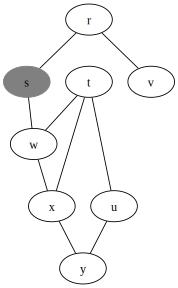

nodo descubierto:  r


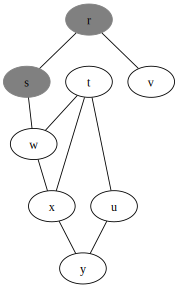

nodo descubierto:  v


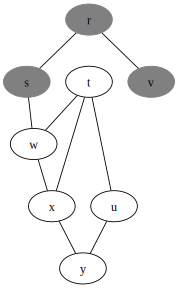

nodo terminado:  v


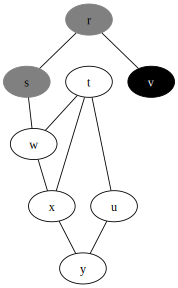

nodo terminado:  r


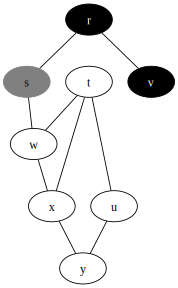

nodo descubierto:  w


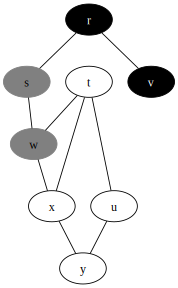

nodo descubierto:  t


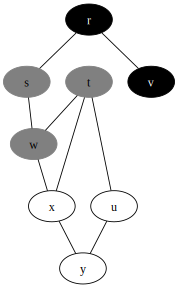

nodo descubierto:  x


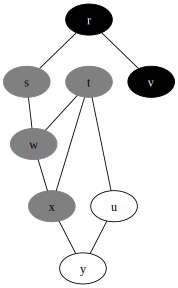

nodo descubierto:  y


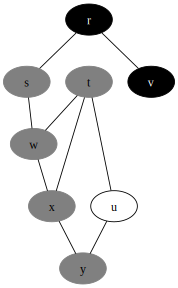

nodo descubierto:  u


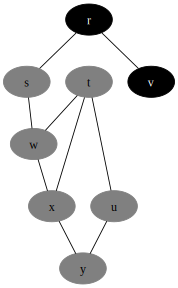

nodo terminado:  u


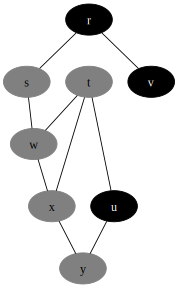

nodo terminado:  y


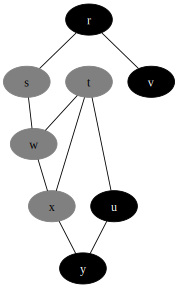

nodo terminado:  x


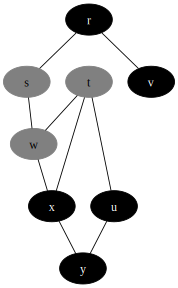

nodo terminado:  t


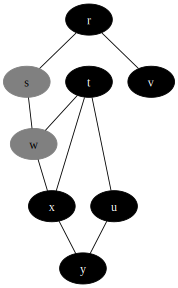

nodo terminado:  w


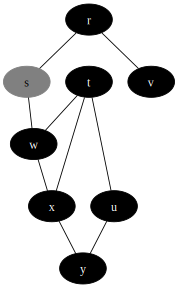

nodo terminado:  s


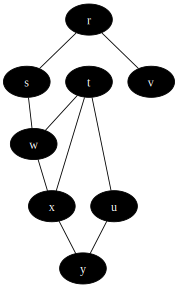

Número de nodos visitados: 8


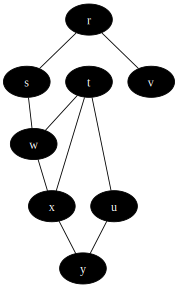

In [6]:
# Tú código debe reproducir la salida de esta celda!

# Inicialmente ponemos todos los nodos en blanco (No visitados)
colores = {}
for v in G1:
    colores[v] = 'white'
    
# Ejecutar DFS arrancando de "s". DFS, debe marcar en gris los nodos descubiertos pero no terminados, 
# y en negro los nodos terminados.
numero_nodos = DFS(G1, 's', colores)

print( "Número de nodos visitados:", numero_nodos)

plotear_grafica(G1, colores)

## 3.- (10pts) Utiliza DFS para crear una función que determine el número de componentes conectados en un grafo. Reproduce la salida de la celda.

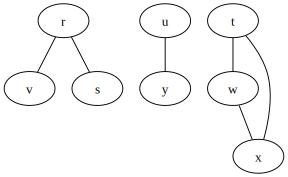

nodo descubierto:  r


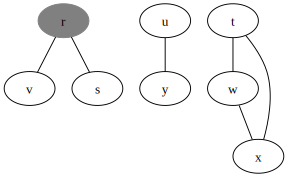

nodo descubierto:  v


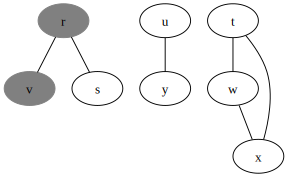

nodo terminado:  v


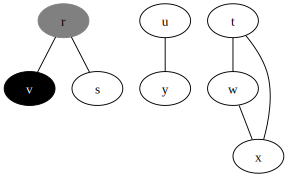

nodo descubierto:  s


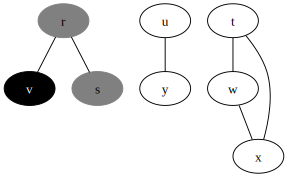

nodo terminado:  s


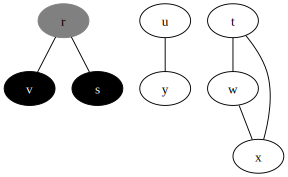

nodo terminado:  r


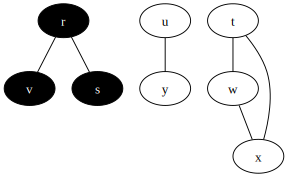

nodo descubierto:  u


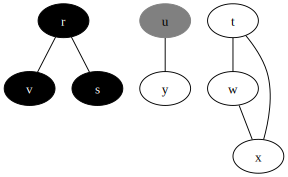

nodo descubierto:  y


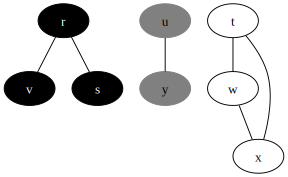

nodo terminado:  y


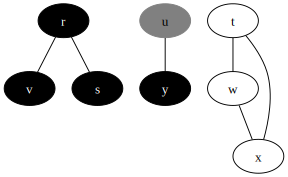

nodo terminado:  u


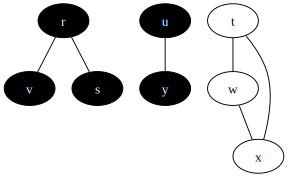

nodo descubierto:  t


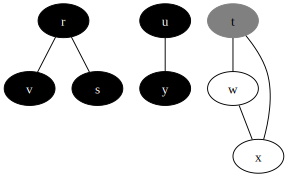

nodo descubierto:  w


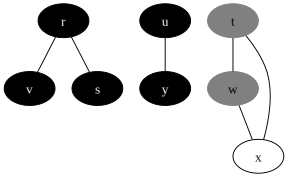

nodo descubierto:  x


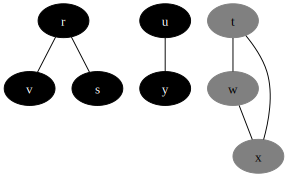

nodo terminado:  x


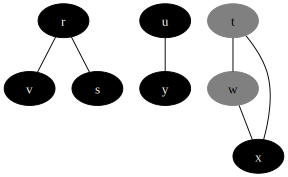

nodo terminado:  w


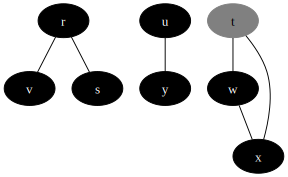

nodo terminado:  t


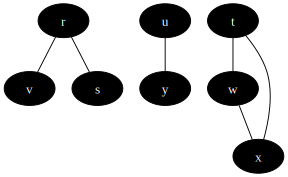

Número de componentes conectados:  3


In [7]:
def connected_components(G):
    # Escribe tú código aquí

    numero_componentes_conectados = 0

    colors = {}
    
    for v in G:
      colors[v] = 'white'

    for v in G:
      if colors[v] == 'white':
        DFS(G, v, colors)
        numero_componentes_conectados += 1

    return numero_componentes_conectados

# Construye el grafo desconetado de la salida aquí
G3 = {'r':{}}
aristas = [('r', 'v'), ('r', 's'), ('u', 'y'), ('t', 'w'), ('x', 'w'), ('t', 'x')]
for v1, v2 in aristas:
    make_link(G3, v1, v2)

plotear_grafica(G3)    

componentes_conectadas = connected_components(G3)
print( "Número de componentes conectados: ", componentes_conectadas)

## 4.- (10pts) Utilice DFS para construir una función que determine si existe un camino que conecte dos nodos.

In [8]:
def conectado(G, v1, v2):
    # Escribe tú código aquí
    
    colors = {}
    for v in G:
      colors[v] = 'white'

    for v in G[v1]:
      DFS(G, v1, colors)

    if colors[v2] == 'black':
      flag_conectado = True
    else:
      flag_conectado = False

    return flag_conectado
        

Construya el siguiente grafo:


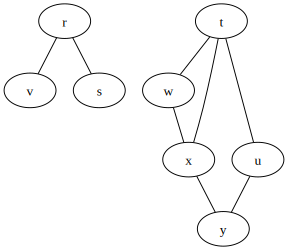

En el grafo, existe un camino de v a s?
Explorando con DFS ...
nodo descubierto:  v


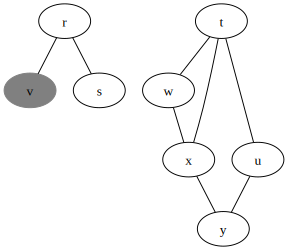

nodo descubierto:  r


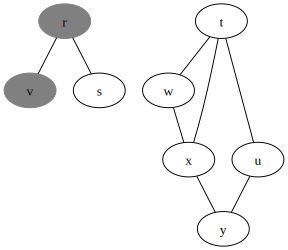

nodo descubierto:  s


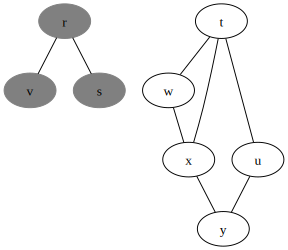

nodo terminado:  s


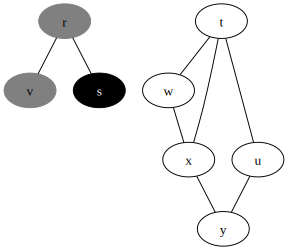

nodo terminado:  r


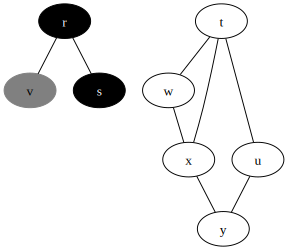

nodo terminado:  v


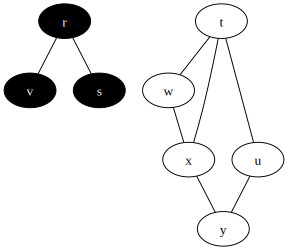

RESPUESTA: True
------------------------------------------------
En el grafo, existe un camino de v a y?
Explorando con DFS ...
nodo descubierto:  v


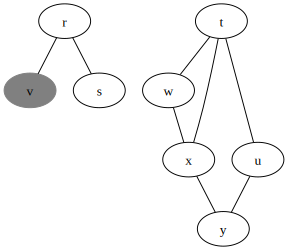

nodo descubierto:  r


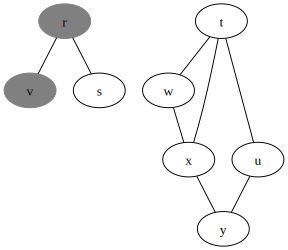

nodo descubierto:  s


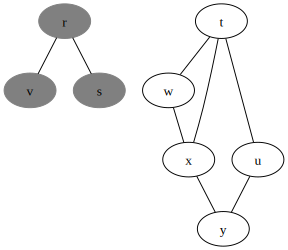

nodo terminado:  s


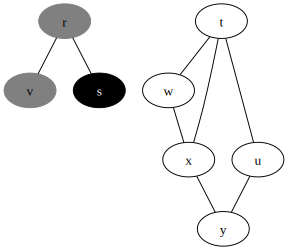

nodo terminado:  r


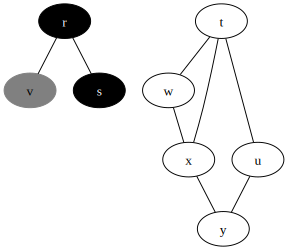

nodo terminado:  v


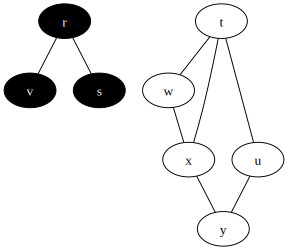

RESPUESTA: False


In [9]:
# Construye el grafo de la salida aquí
G2 = {'r':{}}
aristas = [('r', 'v'), ('r', 's'), ('t', 'w'), ('x', 'w'), ('t', 'x'), ('t', 'u'), ('u', 'y'), ('y', 'x')]
for v1, v2 in aristas:
    make_link(G2, v1, v2)

print ("Construya el siguiente grafo:")
plotear_grafica(G2)
print( "En el grafo, existe un camino de v a s?")
print( "Explorando con DFS ...")
r1=conectado(G2, 'v', 's')
print( "RESPUESTA:", r1)
print( "------------------------------------------------")
print ("En el grafo, existe un camino de v a y?" )
print ("Explorando con DFS ...")
r2=conectado(G2, 'v', 'y')
print( "RESPUESTA:", r2)

## 5.- (10pts) Implemente BFS y reproduzca la salida mostrada. Especialmente, el número de nodos visitados, la lista de padres, y el nivel de capa de cada nodo

In [26]:
def BFS(G, vertice):
    # Aquí va tú código

    nodosvisitados = 1

    Queue = [vertice]

    padres = {vertice: None}
    nivelcapas = {vertice: 0}

    color = {}
    for v in G:
      color[v] = 'white'

    color[vertice] = 'gray' 
    plotear_grafica(G, color) 

    while len(Queue) > 0:
      v = Queue[0]

      for u in G[v]:

        if (color[u] == 'white') and ((G[v])[u] == 1): 
          Queue.append(u)
          color[u] = 'gray'
          plotear_grafica(G, color)
          padres[u] = v
          nivelcapas[u] = nivelcapas[v] + 1
          nodosvisitados += 1

      Queue.pop(0)
      color[v] = 'black'  
      plotear_grafica(G, color)    

    return nodosvisitados, padres, nivelcapas

Este es un ejemplo de la salida:


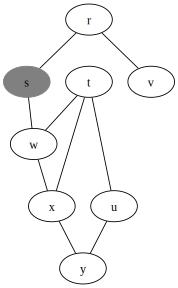

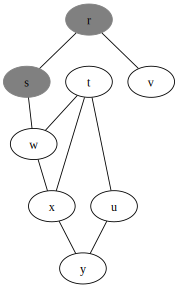

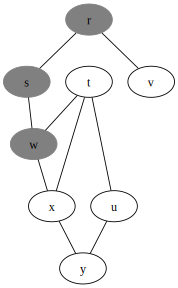

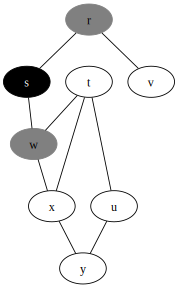

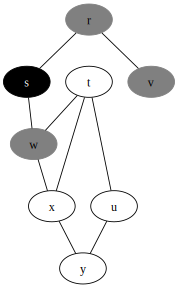

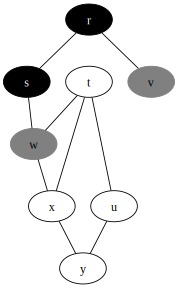

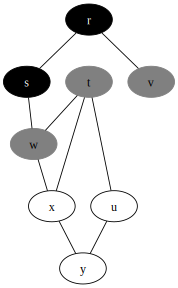

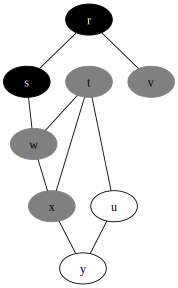

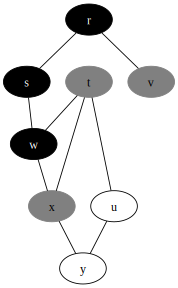

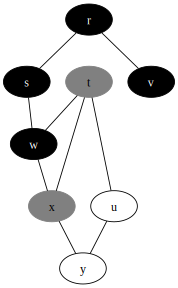

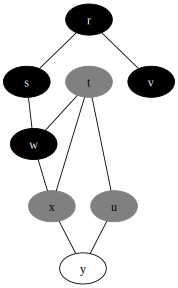

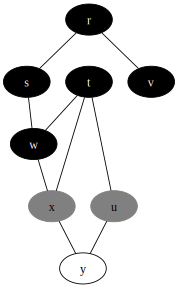

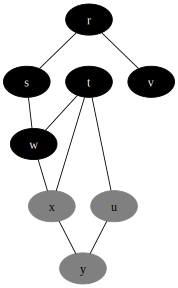

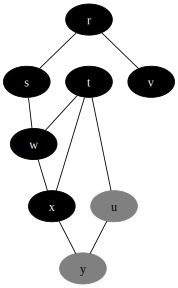

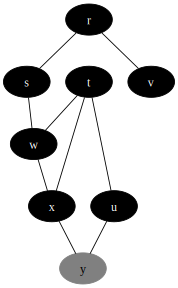

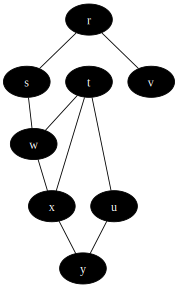

Número de nodos visitados: 8
Padres de los nodos en el árbol de búsqueda: {'s': None, 'r': 's', 'w': 's', 'v': 'r', 't': 'w', 'x': 'w', 'u': 't', 'y': 'x'}
Nivel de la capa en la exploración: {'s': 0, 'r': 1, 'w': 1, 'v': 2, 't': 2, 'x': 2, 'u': 3, 'y': 3}


In [27]:
print( "Este es un ejemplo de la salida:")
n,p,d=BFS(G1, "s")
print( "Número de nodos visitados:", n)
print( "Padres de los nodos en el árbol de búsqueda:", p)
print( "Nivel de la capa en la exploración:", d)


## 6.- (10pts) Implemente un DFS y reproduzca la salida mostrada. Especialmente,  la estructura de PARENTESIS de los nodos visitados, la lista de padres, las listas del tiempo en que fueron descubiertos (d) y terminados (f) los nodos, y el árbol de búsqueda a través de la función plotear_grafod(

Estructura de paréntesis de la exploración DFS: 
(s
(r
(v
v)
r)
(w
(t
(x
(y
(u
u)
y)
x)
t)
w)
s)
Padres según el árbol de búsqueda: {'s': None, 'v': 'r', 'r': 's', 'u': 'y', 'y': 'x', 'x': 't', 't': 'w', 'w': 's'}
Tiempo en que fue descubierto cada nodo: {'s': 1, 'r': 2, 'v': 3, 'w': 6, 't': 7, 'x': 8, 'y': 9, 'u': 10}
Tiempo en que fue terminado cada nodo {'v': 4, 'r': 5, 'u': 11, 'y': 12, 'x': 13, 't': 14, 'w': 15, 's': 16}


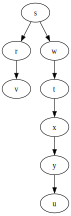

In [30]:
time = 0

def DFS_timestamp(G, nodo, color, padres, d, f):
    # Escribe tú código aquí

    global time 

    if nodo in color:
      if color[nodo] == 'gray' or color[nodo] == 'black':
        return 0 

    if time == 0:
      padres[nodo] = None

    val = 0

    time += 1
    print('(' + nodo)
    color[nodo] = 'gray'
    d[nodo] = time
    numeronodosvisitados = 1

    for v in G[nodo]:
      if G[nodo][v] == 1:
       
        val = DFS_timestamp(G, v, color, padres, d, f)
        numeronodosvisitados += val

        if val > 0:
           padres[v] = nodo


    print(nodo + ')')
    color[nodo] = 'black'
    time += 1
    f[nodo] = time

    return numeronodosvisitados


color = {}
d = {}
f = {}
padres = {}

print( "Estructura de paréntesis de la exploración DFS: ")
DFS_timestamp(G1, 's', color, padres, d, f)

print( "Padres según el árbol de búsqueda:", padres)
print( "Tiempo en que fue descubierto cada nodo:",d)
print( "Tiempo en que fue terminado cada nodo", f)
plotear_graficad(padres)
